In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from PIL import Image
import io

# Load data.npy
data = np.load('data.npy', allow_pickle=True)[()]
# List keys of dataset
data.keys()
# print(data)

dict_keys(['__header__', '__version__', '__globals__', 'illum1', 'illum2', 'x', 'y', 'z'])

In [6]:
n = 1/0.005
# print(int(n))

spacing = np.linspace(0, 1, int(n))
# spacing = np.reshape(spacing,(1,int(n)))
# print(np.shape(spacing))
# print(spacing)

x, y = np.meshgrid(spacing, spacing)
# print("x = ", x)
# print("y = ", y)

m, n = np.shape(x)
z = np.zeros((m,n))
for i in range(m):
    for j in range(n):
        z[i,j] = 1 - x[i,j] - y[i,j]
        
print("z = ", z)
xyz = np.dstack((x, y, z))
print(np.shape(xyz))
XYZ = xyz
# xyz = np.reshape(xyz, (200, 200, 3))
# print(np.shape(xyz))
print("xyz = ", xyz[:,:,2])

set_709 = np.array([[0.640, 0.330, 0.030],
                    [0.300, 0.600, 0.100],
                    [0.150, 0.060, 0.790]])

kcoeffmat = np.array([[1, 0, 0],
                     [0, 1, 0],
                     [0, 0, 1]])

M = np.dot(set_709.T,kcoeffmat)

# rgb = M^-1*xyz
rgb = np.zeros((np.shape(XYZ)))
planes = 3
for i in range(m):
    for j in range(n):
        rgb[i,j,:] = np.dot(np.linalg.inv(M),XYZ[i,j,:])
        for k in range(planes):
            if rgb[i,j,k] < 0:
                rgb[i,j,:] = 1
        
print(np.shape(rgb))

gamma = 2.2

rgb = np.flip(rgb,0) # ???????

rgb = rgb**(1/gamma)

# plt.figure()
# plt.imshow(XYZ,extent=[0, 1, 0, 1])
# something wrong with the XYZ definition???

z =  [[ 1.00000000e+00  9.94974874e-01  9.89949749e-01 ...  1.00502513e-02
   5.02512563e-03  0.00000000e+00]
 [ 9.94974874e-01  9.89949749e-01  9.84924623e-01 ...  5.02512563e-03
   2.16840434e-17 -5.02512563e-03]
 [ 9.89949749e-01  9.84924623e-01  9.79899497e-01 ... -6.76542156e-17
  -5.02512563e-03 -1.00502513e-02]
 ...
 [ 1.00502513e-02  5.02512563e-03 -1.11022302e-16 ... -9.79899497e-01
  -9.84924623e-01 -9.89949749e-01]
 [ 5.02512563e-03  0.00000000e+00 -5.02512563e-03 ... -9.84924623e-01
  -9.89949749e-01 -9.94974874e-01]
 [ 0.00000000e+00 -5.02512563e-03 -1.00502513e-02 ... -9.89949749e-01
  -9.94974874e-01 -1.00000000e+00]]
(200, 200, 3)
xyz =  [[ 1.00000000e+00  9.94974874e-01  9.89949749e-01 ...  1.00502513e-02
   5.02512563e-03  0.00000000e+00]
 [ 9.94974874e-01  9.89949749e-01  9.84924623e-01 ...  5.02512563e-03
   2.16840434e-17 -5.02512563e-03]
 [ 9.89949749e-01  9.84924623e-01  9.79899497e-01 ... -6.76542156e-17
  -5.02512563e-03 -1.00502513e-02]
 ...
 [ 1.00502513e-02 

In [7]:
x = data.get("x")
y = data.get("y")
z = data.get("z")
# print(np.shape(x))

n = np.size(x)
shape = (1,n)
x_c = np.zeros(shape)
y_c = np.zeros(shape)
for i in range(n):
    X = x[0,i]
    Y = y[0,i]
    Z = z[0,i]
    x_c[0,i] = X/(X + Y + Z)
    y_c[0,i] = Y/(X + Y + Z)
    

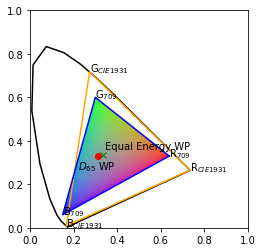

In [8]:
plt.figure()
plt.imshow(rgb,extent=[0, 1, 0, 1])
# plt.plot(np.append(x_c[0],x_c[0,0]),np.append(y_c[0],y_c[0,0]),'k-')

# adding triangles
set_CIE_1931 = np.array([[0.73467, 0.26533, 0.0],
                     [0.27376, 0.71741, 0.00883],
                     [0.16658, 0.00886, 0.82456]])

set_709 = np.array([[0.640, 0.330, 0.030],
                    [0.300, 0.600, 0.100],
                    [0.150, 0.060, 0.790]])

D65 = np.array([[0.3127, 0.3290, 0.3583]])

EE = np.array([[0.3333, 0.3333, 0.3333]])

location = 3
rgblabel = np.array(['R', 'G', 'B'])
# plt.figure()
# Chromaticities
plt.plot(np.append(x_c[0],x_c[0,0]),np.append(y_c[0],y_c[0,0]),'k-')
# RGB CIE 1931
plt.plot(np.append(set_CIE_1931[:,0],set_CIE_1931[0,0]),np.append(set_CIE_1931[:,1],set_CIE_1931[0,1]),color='orange')
for i in range(location):
    plt.text(set_CIE_1931[i,0],set_CIE_1931[i,1],rgblabel[i] + '$_{CIE1931}$')
# RGB 709
plt.plot(np.append(set_709[:,0],set_709[0,0]),np.append(set_709[:,1],set_709[0,1]),color='blue')
for i in range(location):
    plt.text(set_709[i,0],set_709[i,1],rgblabel[i] + '$_{709}$')

plt.plot(D65[0,0],D65[0,1],'ro')
plt.text(D65[0,0]-0.09,D65[0,1]-0.06,'$D_{65}$ WP')
plt.plot(EE[0,0],EE[0,1],'gx')
plt.text(EE[0,0]+0.01,EE[0,1]+0.03,'Equal Energy WP')


png1 = io.BytesIO()
plt.savefig(png1, format="png")
img_out = Image.open(png1)
img_out.save("colordiagram.tif")
png1.close()